In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
import math
import os

In [16]:
path = 'data/test_1706__Direct2D_windup_app.csv'
data_in = pd.read_csv(path)
data_in = data_in.reset_index()

In [17]:
data_color_changed = data_in[data_in['event_type'] == 'color changed at']
indices_color_changed = data_color_changed['index'].tolist()
data_color_changed = data_color_changed.reset_index()

data_got_color = data_in[data_in['event_type'] == 'got color at']

data_got_color['color_value'] = -1
for index, row in data_got_color.iterrows():
    for i in range (0, len(indices_color_changed)):
        if index > indices_color_changed[i]:
            data_got_color.loc[index, 'color_value'] = i
data_color_changed

,level_0,index,event_type,color_value,timestamp


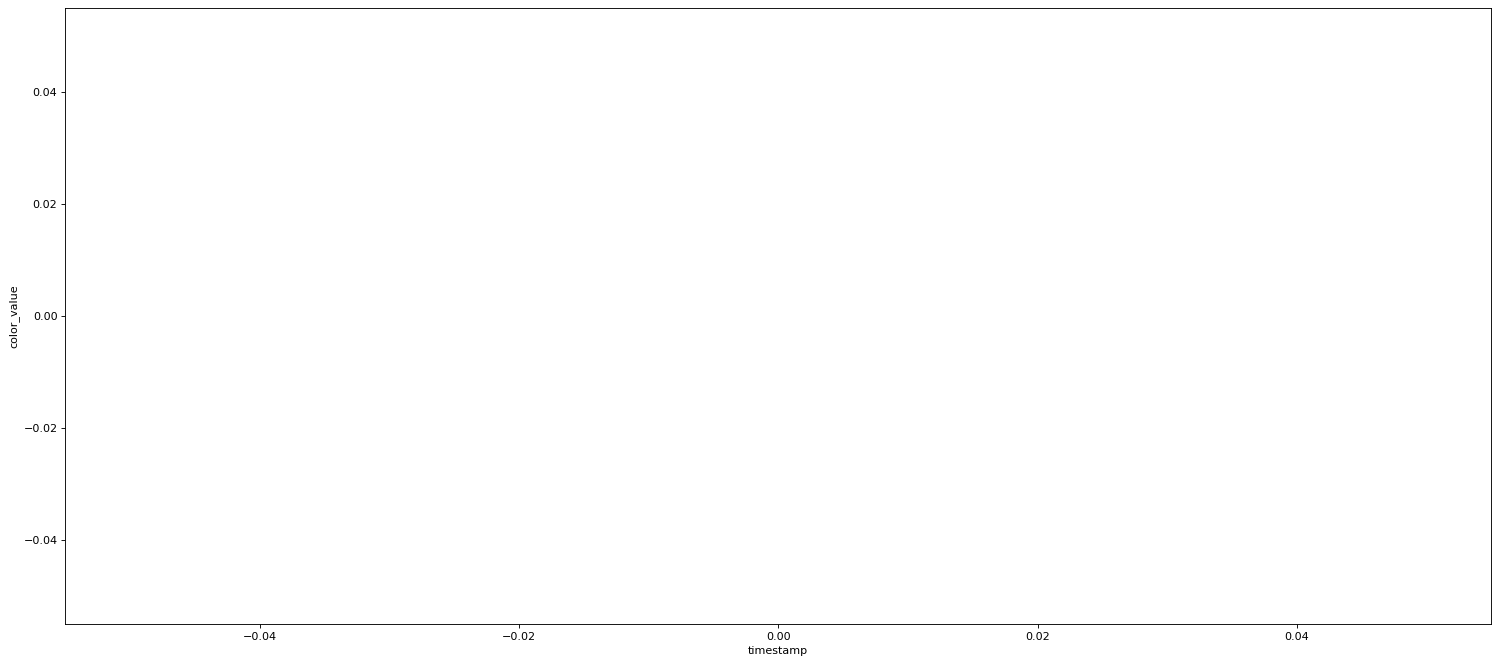

In [18]:

plt.figure(figsize=(23, 10), dpi=80)
ax = plt.gca()

plot = sns.lineplot(data=data_got_color[data_got_color['color_value'] > -1], x='timestamp', y='color_value', marker='o', linewidth='2')

for value in data_got_color[data_got_color['color_value'] > -1]['timestamp']:
    ax.axvline(value, color='grey', linewidth='1')


In [9]:
data_in_app = pd.read_csv('data/setup_test_windup_app.csv')
# data_in_app = data_in_app.reset_index()
data_in_app

,event_type,color_value,timestamp
0,start,-1,1848731559
1,render_start,0,1848731683
2,render_stop,0,1848731749
3,render_start,1,1848931559
4,render_stop,1,1848931622
5,render_start,2,1849131559
6,render_stop,2,1849131620
7,render_start,3,1849331559
8,render_stop,3,1849331621
9,render_start,4,1849531559


In [20]:
path = 'data/test_1706__Direct2D_windup_program.csv'

In [21]:
data_in = pd.read_csv(path)
data_in

,event_type,timestamp,color_equal
0,got color at,-880281209,1
1,got color at,-880280010,0
2,got color at,-880254977,0
3,got color at,-880239825,1
4,got color at,-880183539,1
5,got color at,-880180854,0
6,got color at,-880119677,1
7,got color at,-880116929,0
8,got color at,-880102987,1
9,got color at,-880052660,0


In [22]:
data_in['color_value'] = -1

increment_counter = 0
for index, row in data_in.iterrows():
    data_in.at[index, 'color_value'] += increment_counter
    if row['color_equal'] == 0:
        increment_counter += 1

data_in

,event_type,timestamp,color_equal,color_value
0,got color at,-880281209,1,-1
1,got color at,-880280010,0,-1
2,got color at,-880254977,0,0
3,got color at,-880239825,1,1
4,got color at,-880183539,1,1
5,got color at,-880180854,0,1
6,got color at,-880119677,1,2
7,got color at,-880116929,0,2
8,got color at,-880102987,1,3
9,got color at,-880052660,0,3


In [23]:
def increment_cell(row):
    if row['color_equal'] == 0: 
        return row['color_value'] + 1 
    else:
        return row['color_value'] 

data_in['color_value'] = data_in.apply(increment_cell, axis=1)
data_in

,event_type,timestamp,color_equal,color_value
0,got color at,-880281209,1,-1
1,got color at,-880280010,0,0
2,got color at,-880254977,0,1
3,got color at,-880239825,1,1
4,got color at,-880183539,1,1
5,got color at,-880180854,0,2
6,got color at,-880119677,1,2
7,got color at,-880116929,0,3
8,got color at,-880102987,1,3
9,got color at,-880052660,0,4


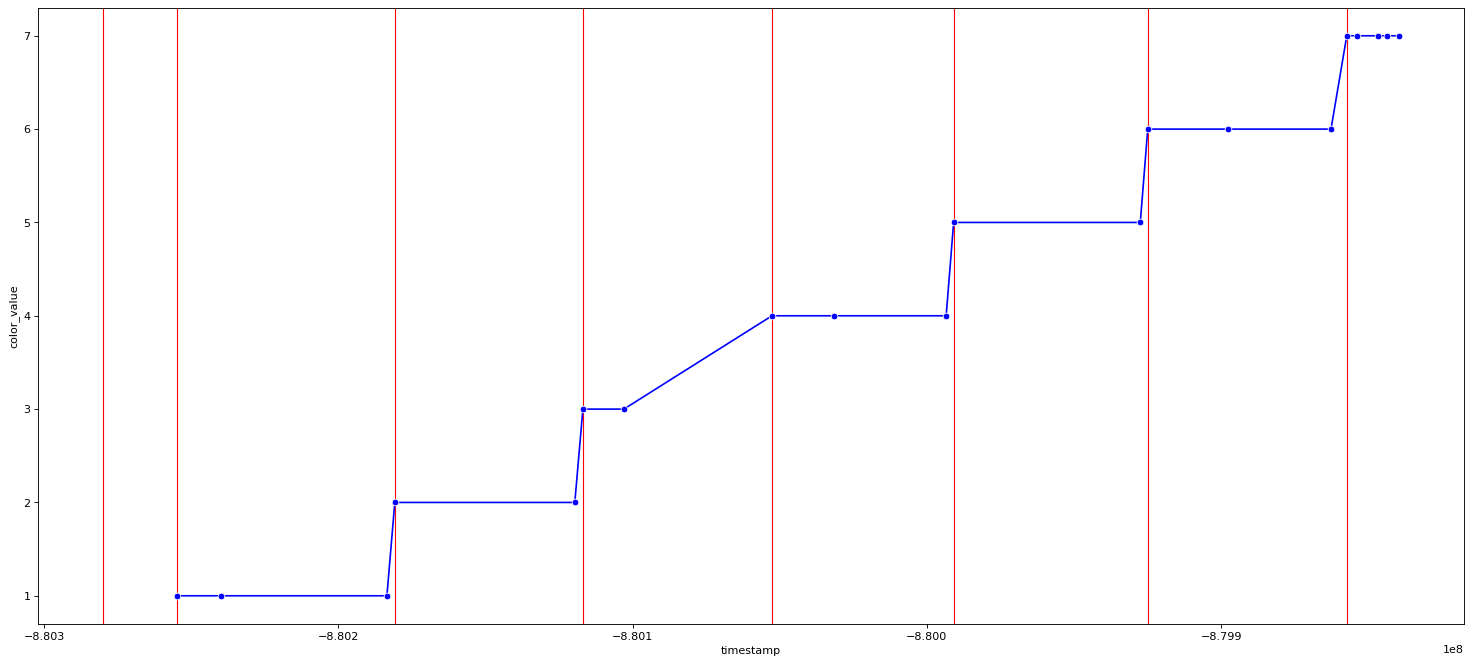

In [25]:
plt.figure(figsize=(23, 10), dpi=80)
ax = plt.gca()

# for value in data_in[data_in['color_value'] > -1]['timestamp']:
#     ax.axvline(value, color='blue', linewidth='0.5')

for value in data_in[data_in['color_equal'] == 0]['timestamp']:
    ax.axvline(value, color='red', linewidth='1')

# for value in data_in_app[data_in_app['event_type'] == 'render_stop']['timestamp']:
#     ax.axvline(value, color='orange', linewidth='1')

palette = {1: 'blue', 0: 'red'}
plot = sns.lineplot(data=data_in[data_in['color_value'] > 0], x='timestamp', y='color_value', marker='o', color='blue')
#sns.scatterplot(data=data_in[data_in['color_value'] > 0], x='timestamp', y='color_value', marker='o', hue='color_equal', palette=palette, zorder=2)

#sns.scatterplot(data=data_in_app[data_in_app['color_value'] > 0], x='timestamp', y='color_value', marker='o', hue='event_type')